In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_wine=pd.read_csv(r'/Users/andyhsu/Desktop/PCA/group wine/train.csv')

In [3]:
df_wine

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,13.05,0.40,2.40,21.68,71.79,2.33,1.87,0.09,1.30,1.070000,1.13,2.45,96.79,1
1,1,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.690000,0.75,2.79,588.86,0
2,2,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.030000,0.86,2.66,954.80,0
3,3,12.06,1.41,2.04,16.58,73.52,0.84,-0.36,0.37,0.14,7.869999,0.37,1.01,194.88,2
4,4,12.35,1.14,1.91,19.52,77.65,2.09,1.98,0.27,1.03,4.620000,1.11,3.46,502.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,529,13.34,1.48,2.59,21.93,86.55,2.49,0.93,0.50,2.19,11.350000,0.53,1.66,565.98,2
530,530,12.34,0.64,2.15,15.87,112.91,1.11,0.61,0.13,0.58,2.620000,0.61,0.84,429.62,2
531,531,10.84,0.92,2.02,14.80,84.33,2.42,1.30,0.05,0.80,1.030000,0.94,2.28,43.57,1
532,532,11.22,2.08,2.34,19.04,91.91,2.72,2.50,0.28,1.67,2.590000,0.73,3.19,534.87,1


In [4]:
# split the data，train：test=7:3
x, y = df_wine.iloc[:, 1:-1].values, df_wine.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)#stratify代表切完後會按照什麼標準
 
# standardize the feature 標準化
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [5]:
# 構造協方差矩陣，得到特徵向量和特徵值
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)

In [6]:
print("values\n ", eigen_val, "\nvector\n ", eigen_vec)# 可以列印看看

values
  [4.75849052 2.66090151 1.46749179 0.85276461 0.80525523 0.60735268
 0.55190473 0.07812807 0.17299814 0.32838668 0.22218648 0.246073
 0.28301278] 
vector
  [[-0.23218589 -0.40125056  0.23057108 -0.20003373 -0.08276581  0.0944592
  -0.3070382   0.04226003 -0.24700619  0.36754657 -0.54253225  0.29341659
  -0.05952328]
 [ 0.15358949 -0.35561049 -0.07809106  0.50160024 -0.33044656  0.57018254
  -0.13566098 -0.01958934 -0.03953694  0.04610899  0.05531892 -0.33957041
   0.13077563]
 [-0.07533349 -0.39075775 -0.47246539 -0.12744982  0.19450511 -0.18875933
  -0.29248522  0.09414713  0.15143706 -0.53670015 -0.26695371 -0.1786188
   0.14192761]
 [ 0.19589123 -0.14511759 -0.60244837  0.19834529  0.0744046  -0.34776996
  -0.05255668 -0.08434273 -0.2049409   0.52529737  0.1938347   0.19960693
   0.08107903]
 [-0.18891193 -0.3008254  -0.04185658  0.17690594  0.68500423  0.31680666
   0.42353058 -0.05033835  0.03846111  0.03527155  0.0158844   0.09551529
  -0.2777778 ]
 [-0.40895302  0.002912

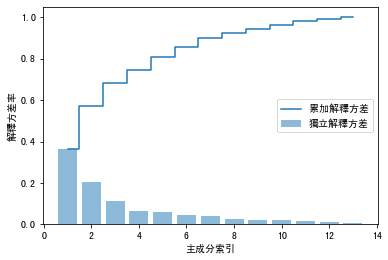

In [7]:
# 解釋方差比
tot = sum(eigen_val)  # 總特徵值和
var_exp = [(i / tot) for i in sorted(eigen_val, reverse=True)]  # 計算解釋方差比，降序
# print(var_exp)
cum_var_exp = np.cumsum(var_exp)  # 累加方差比率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 顯示中文
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='獨立解釋方差')  # 柱狀 Individual_explained_variance
plt.step(range(1, 14), cum_var_exp, where='mid', label='累加解釋方差')  # Cumulative_explained_variance
plt.ylabel("解釋方差率")
plt.xlabel("主成分索引")
plt.legend(loc='right')
plt.show()

In [8]:
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:, i]) for i in range(len(eigen_val))]
eigen_pairs

[(4.758490518915117,
  array([-0.23218589,  0.15358949, -0.07533349,  0.19589123, -0.18891193,
         -0.40895302, -0.43271734,  0.23208172, -0.33874253, -0.01307058,
         -0.28253373, -0.36447139, -0.32685306])),
 (2.660901512295885,
  array([-0.40125056, -0.35561049, -0.39075775, -0.14511759, -0.3008254 ,
          0.00291237,  0.06769783, -0.19990456,  0.00370668, -0.49560499,
          0.22219568,  0.15608668, -0.29046029])),
 (1.4674917878769036,
  array([ 0.23057108, -0.07809106, -0.47246539, -0.60244837, -0.04185658,
         -0.08116316, -0.08390372, -0.31096101, -0.08267338,  0.25662773,
         -0.31115441, -0.22147096,  0.1547127 ])),
 (0.8527646143139749,
  array([-0.20003373,  0.50160024, -0.12744982,  0.19834529,  0.17690594,
          0.11493006,  0.06625189, -0.46383829,  0.33474938, -0.07420527,
         -0.43910408,  0.13094305, -0.24746202])),
 (0.8052552287297706,
  array([-0.08276581, -0.33044656,  0.19450511,  0.0744046 ,  0.68500423,
         -0.15906458, 

In [9]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)  # (特徵值，特徵向量)降序排列
eigen_pairs

[(4.758490518915117,
  array([-0.23218589,  0.15358949, -0.07533349,  0.19589123, -0.18891193,
         -0.40895302, -0.43271734,  0.23208172, -0.33874253, -0.01307058,
         -0.28253373, -0.36447139, -0.32685306])),
 (2.660901512295885,
  array([-0.40125056, -0.35561049, -0.39075775, -0.14511759, -0.3008254 ,
          0.00291237,  0.06769783, -0.19990456,  0.00370668, -0.49560499,
          0.22219568,  0.15608668, -0.29046029])),
 (1.4674917878769036,
  array([ 0.23057108, -0.07809106, -0.47246539, -0.60244837, -0.04185658,
         -0.08116316, -0.08390372, -0.31096101, -0.08267338,  0.25662773,
         -0.31115441, -0.22147096,  0.1547127 ])),
 (0.8527646143139749,
  array([-0.20003373,  0.50160024, -0.12744982,  0.19834529,  0.17690594,
          0.11493006,  0.06625189, -0.46383829,  0.33474938, -0.07420527,
         -0.43910408,  0.13094305, -0.24746202])),
 (0.8052552287297706,
  array([-0.08276581, -0.33044656,  0.19450511,  0.0744046 ,  0.68500423,
         -0.15906458, 

In [10]:
eigen_pairs[0][1][np.newaxis,:]

array([[-0.23218589,  0.15358949, -0.07533349,  0.19589123, -0.18891193,
        -0.40895302, -0.43271734,  0.23208172, -0.33874253, -0.01307058,
        -0.28253373, -0.36447139, -0.32685306]])

In [11]:
eigen_pairs[0][1][:,np.newaxis]

array([[-0.23218589],
       [ 0.15358949],
       [-0.07533349],
       [ 0.19589123],
       [-0.18891193],
       [-0.40895302],
       [-0.43271734],
       [ 0.23208172],
       [-0.33874253],
       [-0.01307058],
       [-0.28253373],
       [-0.36447139],
       [-0.32685306]])

In [12]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))  # 降維投影矩陣W
w

array([[-0.23218589, -0.40125056],
       [ 0.15358949, -0.35561049],
       [-0.07533349, -0.39075775],
       [ 0.19589123, -0.14511759],
       [-0.18891193, -0.3008254 ],
       [-0.40895302,  0.00291237],
       [-0.43271734,  0.06769783],
       [ 0.23208172, -0.19990456],
       [-0.33874253,  0.00370668],
       [-0.01307058, -0.49560499],
       [-0.28253373,  0.22219568],
       [-0.36447139,  0.15608668],
       [-0.32685306, -0.29046029]])

In [13]:
x_train_pca = x_train_std.dot(w)

In [14]:
x_train_pca

array([[ 2.30840761e-01,  3.29636609e+00],
       [ 6.59022905e-02,  1.24946632e+00],
       [-1.86710254e+00,  1.11000660e+00],
       [-2.54704336e+00, -1.72638407e-01],
       [-1.79055483e+00, -1.67028612e-03],
       [ 1.40818330e+00,  2.21792229e+00],
       [ 1.75127768e+00, -2.25798274e+00],
       [ 3.30009987e+00, -7.15700410e-01],
       [-2.55671518e+00,  9.33235928e-02],
       [ 2.82246569e+00, -2.20213585e+00],
       [-1.51152360e+00,  1.11715077e+00],
       [ 2.61283334e+00, -2.17413637e+00],
       [ 3.89957853e-01,  3.65552075e+00],
       [ 2.25454272e+00, -3.56413901e+00],
       [ 2.93987277e+00, -1.14620201e+00],
       [-3.83308608e+00, -1.62516868e+00],
       [-2.96003026e+00, -3.39771737e-02],
       [ 1.06251739e+00,  1.07561044e+00],
       [-1.83732333e+00, -7.04647546e-02],
       [ 1.44253512e+00, -2.85243222e+00],
       [-1.01780898e+00,  1.68283557e+00],
       [ 1.24525827e+00,  1.25506360e+00],
       [ 6.27286191e-01,  1.33210644e+00],
       [-1.

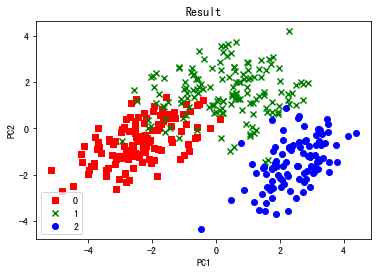

In [15]:
color = ['r', 'g', 'b']
marker = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), color, marker):
    plt.scatter(x_train_pca[y_train == l, 0],
                x_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)
plt.title('Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [16]:
x_train_pca

array([[ 2.30840761e-01,  3.29636609e+00],
       [ 6.59022905e-02,  1.24946632e+00],
       [-1.86710254e+00,  1.11000660e+00],
       [-2.54704336e+00, -1.72638407e-01],
       [-1.79055483e+00, -1.67028612e-03],
       [ 1.40818330e+00,  2.21792229e+00],
       [ 1.75127768e+00, -2.25798274e+00],
       [ 3.30009987e+00, -7.15700410e-01],
       [-2.55671518e+00,  9.33235928e-02],
       [ 2.82246569e+00, -2.20213585e+00],
       [-1.51152360e+00,  1.11715077e+00],
       [ 2.61283334e+00, -2.17413637e+00],
       [ 3.89957853e-01,  3.65552075e+00],
       [ 2.25454272e+00, -3.56413901e+00],
       [ 2.93987277e+00, -1.14620201e+00],
       [-3.83308608e+00, -1.62516868e+00],
       [-2.96003026e+00, -3.39771737e-02],
       [ 1.06251739e+00,  1.07561044e+00],
       [-1.83732333e+00, -7.04647546e-02],
       [ 1.44253512e+00, -2.85243222e+00],
       [-1.01780898e+00,  1.68283557e+00],
       [ 1.24525827e+00,  1.25506360e+00],
       [ 6.27286191e-01,  1.33210644e+00],
       [-1.

In [17]:
dfw=pd.DataFrame(w.T)
dfw.index=['first','second']
dfw.columns=df_wine.iloc[:,1:-1].columns
dfw.style.background_gradient(cmap='prism_r').format("{:.2}")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
first,-0.23,0.15,-0.075,0.2,-0.19,-0.41,-0.43,0.23,-0.34,-0.013,-0.28,-0.36,-0.33
second,-0.4,-0.36,-0.39,-0.15,-0.3,0.0029,0.068,-0.2,0.0037,-0.5,0.22,0.16,-0.29


In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
a=np.array([1,2,3,2,1,1,1,3,4])
b=np.array([1,1,2,2,1,3,3,1,4])
pd.DataFrame(confusion_matrix(a,b),index=[1,2,3,4],columns=[1,2,3,4])

,1,2,3,4
1,2,0,2,0
2,1,1,0,0
3,1,1,0,0
4,0,0,0,1
